In [1]:
from opqua.model import Model

Vector-borne model with susceptible and infected hosts and vectors, showing a metapopulation model setup with multiple populations connected to each other by "population contact" events between vectors and hosts, in which a vector and a
host from different populations contact each other without migrating from one population to another.

**Population A** is connected to **Population B** and to **Clustered Population** 4 (both are one-way connections).

**Clustered Populations 0-4** are all connected to each other in two-way connections.

Isolated population is not connected to any others.

Two different pathogen genotypes are initially seeded into **Populations A** and **B**.

## Model initialization and setup

### Create a new `Model` object

In [2]:
model = Model() # Make a new model object.

### Define a Setup for our system

Create a new set of parameters called `setup_normal` to be used to simulate a population in the model. Use the default parameter set for a _vector-borne_ model.

In [3]:
model.newSetup(     # Create a new Setup.
    'setup_normal', 
        # Name of the setup.
    preset='vector-borne'
        # Use default 'vector-borne' parameters.
    )

We make a second setup called `setup_cluster` with the same parameters, but doubles contact rate of the first setup.

In [4]:
model.newSetup(
    'setup_cluster',
        # Name of the setup.
    contact_rate_host_vector = ( 2 * model.setups['setup_normal'].contact_rate_host_vector ),
        # rate of host-vector contact events, not necessarily transmission, assumes 
        # constant population density.
    preset='vector-borne'
        # Use default 'vector-borne' parameters.
    ) 

### Create a population in our model

Create a population of 20 hosts and 20 vectors called `population_A`. The population uses parameters stored in `setup_normal`.

In [5]:
model.newPopulation(    # Create a new Population.
    'population_A',     
        # Unique identifier for this population in the model.
    'setup_normal',     
        # Predefined Setup object with parameters for this population.
    num_hosts=20, 
        # Number of hosts in the population with.
    num_vectors=20
        # Number of vectors in the population with.
    )

Create a second population of 20 hosts and 20 vectors called `population_B`. The population uses parameters stored in `setup_normal`. The two populations that will be connected.

In [6]:
model.newPopulation(    # Create a new Population.
    'population_B',
        # Unique identifier for this population in the model.
    'setup_normal', 
        # Predefined Setup object with parameters for this population.
    num_hosts=20, 
        # Number of hosts in the population with.
    num_vectors=20
        # Number of vectors in the population with.
    )

Create a thrid population of 20 hosts and 20 vectors called `isolated_population` that will remain isolated. The population uses parameters stored in `setup_normal`.

In [7]:
model.newPopulation(    # Create a new Population.
    'isolated_population',
        # Unique identifier for this population in the model.
    'setup_normal',
        # Predefined Setup object with parameters for this population.
    num_hosts=20, 
        # Number of hosts in the population with.
    num_vectors=20
        # Number of vectors in the population with.
    )

Create a cluster of 5 populations connected to each other with a population contact rate of 1e-2 between each of them in both directions. Each population has an numbered ID with the prefix *clustered_population_*, has the parameters defined in the *setup_cluster* setup, and has 20 hosts and vectors.

In [8]:
model.createInterconnectedPopulations(  # Create new populations, link all of them to each other.
    5,
        # number of populations to be created.
    'clustered_population_',
        # prefix for IDs to be used for this population in the model.
    'setup_cluster',
        # Predefined Setup object with parameters for this population.
    host_migration_rate=0, 
        #  host migration rate between populations
    vector_migration_rate=0,
        # vector migration rate between populations
    vector_host_contact_rate=2e-2,
        # host-host inter-population contact rate between populations
    host_vector_contact_rate=2e-2,
        # host-vector inter-population contact rate between populations
    num_hosts=20, 
        # number of hosts to initialize population with.
    num_vectors=20
        # number of hosts to initialize population with.
    )

Now, we link `population_A` to one of the clustered populations with a one-way migration rate of 2e-3.

In [9]:
model.linkPopulationsHostVectorContact(
        # Set host-vector contact rate from one population towards another.
    'population_A',
        # Origin population ID for which migration rate will 
        # be specified.
    'clustered_population_4',
        # destination population ID for which migration rate 
        # will be specified.
    2e-2
        # migration rate from one population to the neighbor.
    )

We link `population_A` to one of the clustered populations with a one-way population contact rate of 1e-2 for `population_A` hosts and `clustered_population_4` vectors. Note that for population contacts, both populations need to have contact rates towards each other (migration does not require this)

In [10]:
model.linkPopulationsVectorHostContact(
        # Set host-vector contact rate from one population towards another.
    'clustered_population_4',
        # Origin population ID for which migration rate will 
        # be specified.
    'population_A',
        # destination population ID for which migration rate 
        # will be specified.
    2e-2
        # migration rate from one population to the neighbor.
    )

We link `population_A` to `population_B` with a one-way migration rate of 2e-2.

In [11]:
model.linkPopulationsHostVectorContact(
        # Set host-vector contact rate from one population towards another.
    'population_A',
        # Origin population ID for which migration rate will 
        # be specified.
    'population_B',
        # destination population ID for which migration rate 
        # will be specified.
    2e-2
        # migration rate from one population to the neighbor.
    )

We link `population_A` to `population_B` with a one-way population contact rate of 2e-2 for `population_A` hosts and `population_B` vectors. Note that for population contacts, both populations need to have contact rates towards each other (migration does not require this)

In [12]:
model.linkPopulationsVectorHostContact(
        # Set host-vector contact rate from one population towards another.
    'population_B',
        # Origin population ID for which migration rate will 
        # be specified.
    'population_A',
        # destination population ID for which migration rate 
        # will be specified.
    2e-2
        # migration rate from one population to the neighbor.
    )

### Manipulate hosts and vectors in the population

`population_A` starts with `AAAAAAAAAA` genotype pathogens.

In [13]:
model.addPathogensToHosts( # Add specified pathogens to random hosts.
    'population_A',
        # ID of population to be modified.
    {'AAAAAAAAAA':5} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values.
    )

`population_B` starts with `GGGGGGGGGG` genotype pathogens.

In [14]:
model.addPathogensToHosts( # Add specified pathogens to random hosts.
    'population_B',
        # ID of population to be modified.
    {'GGGGGGGGGG':5} 
        # Dictionary containing pathogen genomes to add as keys and 
        # number of hosts each one will be added to as values.
    )

## Model simulation

In [15]:
model.run(          # Simulate model for a specified time between two time points.
    0,              # Initial time point.
    100,            # Final time point.
    time_sampling=0 # how many events to skip before saving a snapshot of the system state.
    )

Simulating time: 100.1491768759948 END


## Output data manipulation and visualization

### Create a table with the results of the given model history

In [16]:
data = model.saveToDataFrame(
        # Creates a pandas Dataframe in long format with the given model history, 
        # with one host or vector per simulation time in each row.
    'metapopulations_population_contact_example.csv'
        # Name of the file to save the data to.
    )
data

Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19925533388085942s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.017675399780273438s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  36 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  58 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.030938148498535156s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  96 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.039101600646972656s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Batch computation too fast (0.07192206382751465s.) Setting batch_size=32.
[Parallel(n_jobs=8)]: Done 288 t

...file saved.


,Time,Population,Organism,ID,Pathogens,Protection,Alive
0,0.0,population_A,Host,population_A_0,NaN,NaN,True
1,0.0,population_A,Host,population_A_1,NaN,NaN,True
2,0.0,population_A,Host,population_A_2,AAAAAAAAAA,NaN,True
3,0.0,population_A,Host,population_A_3,AAAAAAAAAA,NaN,True
4,0.0,population_A,Host,population_A_4,NaN,NaN,True
...,...,...,...,...,...,...,...
195515,100.0,clustered_population_4,Vector,clustered_population_4_15,NaN,NaN,True
195516,100.0,clustered_population_4,Vector,clustered_population_4_16,NaN,NaN,True
195517,100.0,clustered_population_4,Vector,clustered_population_4_17,NaN,NaN,True
195518,100.0,clustered_population_4,Vector,clustered_population_4_18,NaN,NaN,True


### Creates a line or stacked line plot with dynamics of a compartment across populations in the model, with one line for each population.

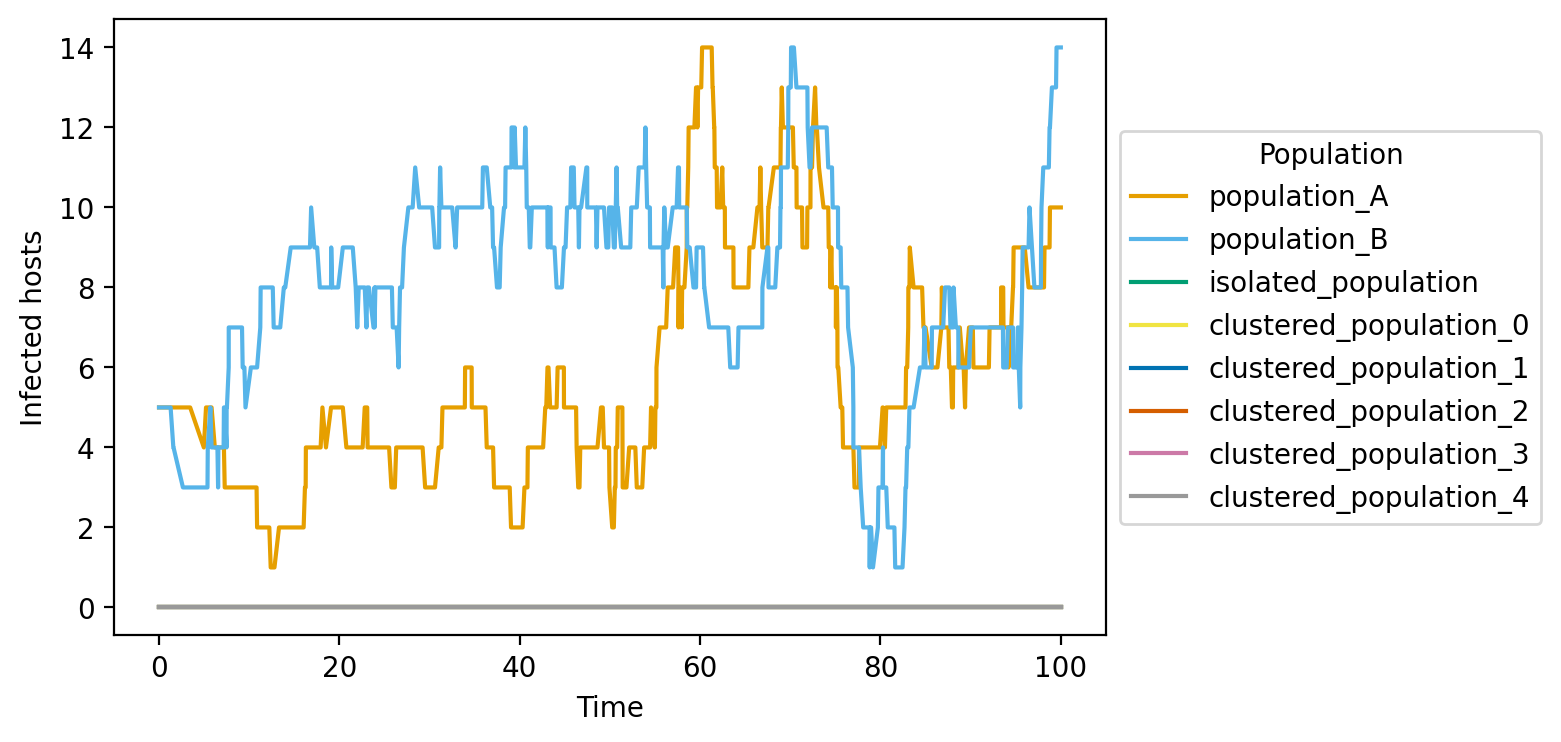

In [17]:
plot = model.populationsPlot( # Plot infected hosts per population over time.
    'metapopulations_population_contact_example.png', 
        # Name of the file to save the plot to.
    data,
        # Dataframe with model history.
    num_top_populations=8, 
        # how many populations to count separately and include as columns, remainder will be 
        # counted under column “Other”
    track_specific_populations=['isolated_population'],
        # Make sure to plot th isolated population totals if not in the top
        # infected populations.
    y_label='Infected hosts' 
        # change y label
    )